# AlexNet
Es una red neuronal profunda que tuvo un impacto significativo en el campo de la visión por computadora y el aprendizaje profundo.

### Orígenes
Diseñado por Alex Krizhevsky, Ilya Sutskever y Geoffrey Hinton.
Se presentó en la competencia [ImageNet](https://www.image-net.org/challenges/LSVRC/) de 2012, donde ganó en la competición de reconocimiento de imágenes.

### Arquitectura
Capas: Consta de 8 capas de aprendizaje profundo, incluyendo 5 capas convolucionales y 3 capas completamente conectadas (densas).

Tamaño de entrada: Originalmente, las imágenes se redimensionaban a 227x227 píxeles.

Funciones de activación: Utiliza la función de activación ReLU (Rectified Linear Unit) para introducir no linealidades en la red.

Max Pooling: Se emplean capas de max pooling después de algunas capas convolucionales para reducir la dimensionalidad y la complejidad computacional.

Regularización: Incluye técnicas como dropout en las capas completamente conectadas para reducir el sobreajuste.

### Innovaciones
GPU: Fue una de las primeras redes en aprovechar el procesamiento paralelo de las GPU, lo que aceleró el entrenamiento significativamente.

Conjuntos de datos grandes: AlexNet fue entrenado en el conjunto de datos ImageNet, que contiene millones de imágenes clasificadas en miles de categorías.

### Impacto
Revolución en el aprendizaje profundo: AlexNet es ampliamente reconocida como uno de los modelos que popularizó el uso de redes neuronales profundas para la clasificación de imágenes.

Influencia: Su éxito llevó al desarrollo de arquitecturas más avanzadas como VGG, GoogLeNet y ResNet.

### Aplicaciones
AlexNet ha sido utilizado en una variedad de aplicaciones, que incluyen:
* Clasificación de imágenes
* Detección de objetos
* Segmentación semántica
* Reconocimiento facial

### LeNet vs AlexNet
<img src="images/CNN/Comparison_image_neural_networks.png" alt="LeNet vs AlexNet" width="500">

Recordemos:
* Padding: Añadir ceros alrededor de la imagen para controlar el tamaño de salida y mejorar el procesamiento de bordes.
* Stride: Define cuántos píxeles el filtro se mueve sobre la imagen, afectando el tamaño del mapa de características resultante.

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Define the AlexNet architecture
def build_alexnet(input_shape, num_classes):
    model = models.Sequential()

    # Layer 1: Convolutional Layer
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Layer 2: Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Layer 3: Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))

    # Layer 4: Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))

    # Layer 5: Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define model parameters
input_shape = (32, 32, 3)  # CIFAR-10 image shape
num_classes = 10  # Number of classes in CIFAR-10

# Build and compile the model
alexnet = build_alexnet(input_shape, num_classes)
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
alexnet.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

# Evaluate the model
test_loss, test_accuracy = alexnet.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 120ms/step - accuracy: 0.2713 - loss: 1.9269 - val_accuracy: 0.5015 - val_loss: 1.3425
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5494 - loss: 1.2508 - val_accuracy: 0.6158 - val_loss: 1.0811
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.6374 - loss: 1.0284 - val_accuracy: 0.6598 - val_loss: 0.9704
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.6954 - loss: 0.8684 - val_accuracy: 0.6810 - val_loss: 0.9244
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.7328 - loss: 0.7686 - val_accuracy: 0.7146 - val_loss: 0.8286
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.7662 - loss: 0.6756 - val_accuracy: 0.7101 - val_loss: 0.8666
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.7934 - loss: 0.5997 - val_accuracy: 0.7208 - val_loss: 0.8455
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.8122 - loss: 0

## Visualizamos algunas de las imágenes del dataset CIFAR-10

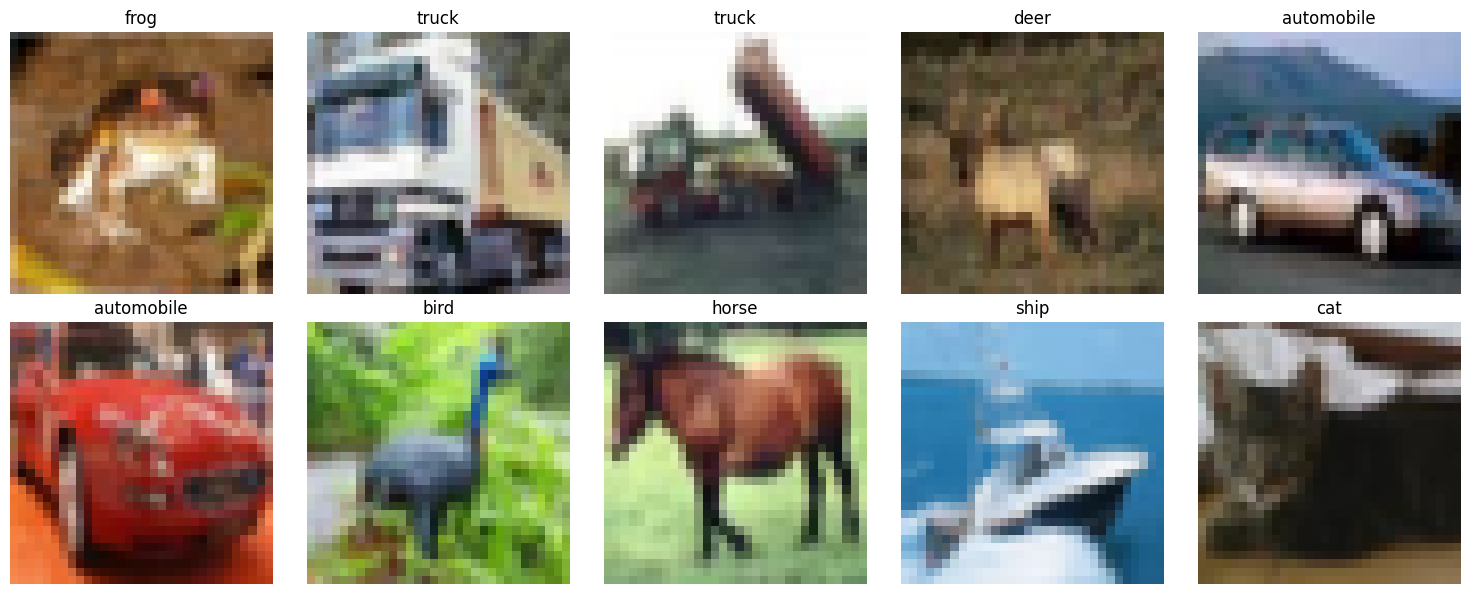

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define CIFAR-10 class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Function to display a few images from the dataset
def plot_cifar10_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])  # labels are in 2D array
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize 10 images from the training set
plot_cifar10_images(x_train, y_train, class_names, num_images=10)


# U-Net
Es una arquitectura de red neuronal convolucional profunda, diseñada específicamente para tareas de segmentación de imágenes, especialmente en aplicaciones biomédicas.

### Orígenes
U-Net fue desarrollada por Olaf Ronneberger, Philipp Fischer y Thomas Brox en 2015.\
Originalmente se creó para la segmentación de imágenes biomédicas, particularmente para la segmentación de células en imágenes de microscopía.

### Arquitectura
La arquitectura de U-Net se caracteriza por su forma en "U", que permite una combinación efectiva de información de bajo y alto nivel:
* Encoder (Contracción):\
Consiste en múltiples bloques de convolución, donde cada bloque aplica una convolución seguida de una activación (usualmente ReLU) y luego un max pooling.\
Cada paso en el encoder reduce la resolución de la imagen mientras aumenta el número de canales, extrayendo características progresivamente más abstractas.
* Bottleneck:\
En la parte más profunda de la red, donde la resolución es más baja y el número de canales es mayor, se pueden aplicar más capas de convolución.
* Decoder (Expansión):\
Utiliza capas de upsampling (o transposed convolutions) para aumentar la resolución de las características extraídas.\
Cada capa de upsampling se combina con las correspondientes características del encoder (skip connections) para proporcionar información de localización precisa.
    * Métodos de Upsampling
        * Transposed Convolution (Deconvolution):
            * Utiliza un filtro (similar a la convolución) que aumenta el tamaño de la entrada. A menudo, se utiliza para aumentar las dimensiones de los mapas de características.
            * Se considera que es más flexible y puede aprender a interpolar mejor los valores
              
              <img src="images/CNN/transposed-convolution.png" alt="Transposed Convolution" width="400">
        * Nearest Neighbor:
            * Nearest Neighbor: Copia el valor del píxel más cercano al nuevo píxel creado.
              
              <img src="images/CNN/image_2024-10-18_143106116.png" alt="Nearest Neighbor" width="400">
        * Max Unpooling:
            * Recupera los índices de las operaciones de max pooling y utiliza estos índices para revertir el proceso de reducción de la dimensión.
              
              <img src="images/CNN/max-unpooling-process.png" alt="Nearest Neighbor" width="400">
* Salida:\
La última capa de la red produce un mapa de segmentación con la misma resolución que la imagen de entrada. Se utiliza una función de activación como softmax o sigmoid, dependiendo de si la segmentación es multiclase o binaria.

<img src="images/CNN/u-net-architecture.png" alt="U-Net Architecture" width="700">

### Aplicaciones
U-Net ha demostrado ser extremadamente efectiva en una variedad de aplicaciones de segmentación de imágenes, incluyendo:
* Segmentación de Imágenes Médicas:
    * Radiografías: Segmentación de áreas anormales o patológicas en radiografías de tórax.
    * Tomografía Computarizada (CT): Identificación de órganos y tumores en imágenes de CT.
    * Resonancia Magnética (MRI): Segmentación de estructuras cerebrales o lesiones.
    * Biología y Microscopía:Segmentación de células en imágenes de microscopía, ayudando en estudios biológicos y en la investigación de enfermedades.
* Segmentación de Imágenes Satelitales: Utilizado en la clasificación y segmentación de terrenos en imágenes satelitales para aplicaciones de planificación urbana y análisis ambiental.
* Segmentación en Video: U-Net también se ha adaptado para tareas de segmentación en secuencias de video, como la identificación de objetos en movimiento.

## Ejercicios:

1. Aplica Transposed convolution a la matriz $A$

$A = \begin{bmatrix}
4 & 3 & 8 \\
7 & 4 & 2 \\
6 & 0 & 1
\end{bmatrix}$

con filtro

$F = \begin{bmatrix}
1 & 3 \\
4 & 2
\end{bmatrix}$

3. Aplica un max pooling de 2x2 a la matriz $B$ y después max unpooling a la matriz resultante.

$B = \begin{bmatrix}
42 & 0 & 7 & 0 \\
4 & 12 & 9 & 20 \\
21 & 15 & 22 & 15 \\
25 & 69 & 33 & 1
\end{bmatrix}$

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)  # For binary segmentation

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Example usage
input_shape = (128, 128, 3)  # Example input shape
model = unet_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional_143"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_13[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_47[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_39    │ (None, 64, 64,    │          0 │ conv2d_48[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_39… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_49[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_40    │ (None, 32, 32,    │          0 │ conv2d_50[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_40… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_51[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_41    │ (None, 16, 16,    │          0 │ conv2d_52[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_41… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_53[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_42    │ (None, 8, 8, 512) │          0 │ conv2d_54[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_42… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_55[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │  2,097,664 │ conv2d_56[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

# GoogLeNet (Inception)

### Orígenes
GoogLeNet fue desarrollado por el equipo de Google, incluyendo a Christian Szegedy y sus colegas, y se presentó en la competición de ImageNet en 2014.\
Ganó el primer lugar en el desafío de clasificación de la competición ImageNet de 2014.

### Arquitectura
GoogLeNet introdujo varios conceptos innovadores en la arquitectura de redes neuronales profundas:

* Inception Modules:\
Módulos de **Inception**. Permiten que la red realice convoluciones de diferentes tamaños (1x1, 3x3, 5x5) y agrupaciones (pooling) en la misma capa. Esto permite a la red capturar características en múltiples escalas.\
Los módulos de Inception permiten que la red sea más profunda sin un aumento significativo en el número de parámetros.
* Profundidad y Ancho:\
GoogLeNet tiene una profundidad de 22 capas, lo que significa que tiene más capas en comparación con muchas arquitecturas anteriores, como AlexNet, que tiene 8 capas.\
La red utiliza un gran número de capas de convolución, pero reduce la dimensionalidad de manera efectiva con convoluciones 1x1, lo que ayuda a mantener un bajo costo computacional.
* Convoluciones 1x1:\
Se utilizan para reducir la dimensionalidad y controlar la complejidad del modelo. Estas capas actúan como un compresor de características antes de aplicar convoluciones más grandes.
* Pooling:\
GoogLeNet también utiliza una combinación de max pooling y average pooling, lo que mejora la generalización y permite que la red capture características de manera más robusta.
* Global Average Pooling:\
En lugar de usar capas completamente conectadas al final, GoogLeNet utiliza una capa de agrupamiento global promedio (Global Average Pooling) para reducir las dimensiones antes de la capa de salida. Esto ayuda a disminuir el número de parámetros y mitiga el sobreajuste.

<img src="images/CNN/Incepption-module.png" alt="Inception o GoogleNet" width="700">

### Aplicaciones
GoogLeNet ha sido utilizado en diversas aplicaciones de visión por computadora, incluyendo:
* Clasificación de Imágenes:\
La arquitectura ha demostrado un rendimiento excepcional en la clasificación de imágenes en conjuntos de datos como ImageNet.
* Detección de Objetos:\
La flexibilidad de los módulos de Inception permite su uso en tareas de detección de objetos, mejorando la precisión en la localización y clasificación de objetos dentro de imágenes.
* Segmentación de Imágenes:\
Se puede adaptar para realizar segmentación semántica de imágenes, proporcionando un mapa de etiquetas para cada píxel.
* Transfer Learning:\
GoogLeNet se utiliza a menudo como base para transfer learning, donde se adapta un modelo preentrenado en un nuevo conjunto de datos para tareas específicas.

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models

def inception_module(x, filters):
    # 1x1 Convolution
    branch1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 1x1 Convolution -> 3x3 Convolution
    branch3x3 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    branch3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(branch3x3)

    # 1x1 Convolution -> 5x5 Convolution
    branch5x5 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    branch5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(branch5x5)

    # 3x3 Max Pooling -> 1x1 Convolution
    branch_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(branch_pool)

    # Concatenate all branches
    outputs = layers.concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return outputs

def googlenet(input_shape, num_classes):
    inputs = layers.Input(input_shape)

    # Initial Convolution Layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Inception Modules
    x = inception_module(x, [64, 128, 128, 32, 32, 32])
    x = inception_module(x, [128, 192, 192, 96, 96, 64])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = inception_module(x, [192, 208, 208, 48, 48, 64])
    x = inception_module(x, [160, 224, 224, 64, 64, 64])
    x = inception_module(x, [128, 256, 256, 64, 64, 64])
    x = inception_module(x, [112, 288, 288, 64, 64, 64])
    x = inception_module(x, [256, 256, 256, 64, 64, 64])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Final layers
    x = inception_module(x, [256, 384, 384, 128, 128, 128])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

# Example usage
input_shape = (224, 224, 3)  # Example input shape
num_classes = 10  # Change based on your dataset
googlenet = googlenet(input_shape, num_classes)
googlenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
googlenet.summary()


Model: "functional_159"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_15[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_46    │ (None, 55, 55,    │          0 │ conv2d_69[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_70 (Conv2D)  │ (None, 55, 55,    │      4,160 │ max_pooling2d_46… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 55, 55,    │    110,784 │ conv2d_70[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_47    │ (None, 27, 27,    │          0 │ conv2d_71[0][0]   │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 27, 27,    │     24,704 │ max_pooling2d_47… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 27, 27,    │      6,176 │ max_pooling2d_47… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_48    │ (None, 27, 27,    │          0 │ max_pooling2d_47… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 27, 27,    │     12,352 │ max_pooling2d_47… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 27, 27,    │    147,584 │ conv2d_73[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 27, 27,    │     25,632 │ conv2d_75[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 27, 27,    │      6,176 │ max_pooling2d_48… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 27, 27,    │          0 │ conv2d_72[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_74[0][0],  │
│                     │                   │            │ conv2d_76[0][0],  │
│                     │                   │            │ conv2d_77[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 27, 27,    │     49,344 │ concatenate_4[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 27, 27,    │     24,672 │ concatenate_4[0]… │
│                     │ 96)               │            │                 

 Total params: 7,970,234 (30.40 MB)

 Trainable params: 7,970,234 (30.40 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Load the image
image_path = '/home/jupyter-user7/Tesis_Mariel/FCGR/Acinetobacter/clase1/Acinetobacter_baumannii_GCF_001441355.1.contigs.png'
img = load_img(image_path)

# Convert the image to a numpy array
img_array = img_to_array(img)

# Check the format and channels
print(f"Image shape: {img_array.shape}")
print(f"Number of channels: {img_array.shape[-1]}")
print(f"Image array data type: {img_array.dtype}")


Image shape: (369, 369, 3)
Number of channels: 3
Image array data type: float32


In [62]:
# Ejemplo de carga de datos (puedes usar ImageDataGenerator para cargar imágenes desde directorios)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/home/jupyter-user7/Tesis_Mariel/FCGR/Acinetobacter',
    target_size=(200, 200),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    '/home/jupyter-user7/Tesis_Mariel/FCGR/Aci_test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)



# Load and preprocess the MNIST dataset
#(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Found 158 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [63]:
from tensorflow.keras import layers, models

###############
model = models.Sequential()

# First block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Second block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Third block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Global Average Pooling instead of Flatten
model.add(layers.GlobalAveragePooling2D())

# Fully connected layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))



In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam',
              #loss='binary_crossentropy',
              #metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 99, 99, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,449 (501.75 KB)

 Trainable params: 127,489 (498.00 KB)

 Non-trainable params: 960 (3.75 KB)

In [74]:
print(f'Número de imágenes en entrenamiento: {train_generator.samples}')
print(f'Número de imágenes en validación: {test_generator.samples}')


Número de imágenes en entrenamiento: 158
Número de imágenes en validación: 56


In [75]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6575 - loss: 0.7158
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 0.8281  
Epoch 3/10


2024-10-18 13:37:26.307975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7427 - loss: 0.6061
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.7584  
Epoch 5/10


2024-10-18 13:37:27.435093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6750 - loss: 0.7105
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.7522  
Epoch 7/10


2024-10-18 13:37:28.698919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7316 - loss: 0.5357
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.8029  
Epoch 9/10


2024-10-18 13:37:29.848878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6838 - loss: 0.7008
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.6051  


2024-10-18 13:37:31.060344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [77]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size if test_generator.samples > 0 else 1,
    epochs=10
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.6919 - loss: 0.5588 - val_accuracy: 0.5312 - val_loss: 0.6925
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6875 - loss: 0.5469 - val_accuracy: 0.5833 - val_loss: 0.6916
Epoch 3/10


2024-10-18 13:54:01.020208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7018 - loss: 0.6291

2024-10-18 13:54:02.044883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Cargar una imagen y hacer predicción
img_path = 'ruta/a/tu/imagen.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch

predictions = model.predict(img_array)
print(f'Predicción: {"Clase 1" if predictions[0][0] > 0.5 else "Clase 0"}')
